1. Is there a relationship between switching providers (providers - boolean) and the quality of internet service (latency - numeric) we receive, how much do we pay?
- (boolean x numeric) one can compare to latency, see relationship between provider and quality of service offered (t-test)

H0: The server provider does have a lower quality of service.

HA: The internet quality has not changed prior to switching service providers.

T1: At the time the trials were conducted there was regional decline in internet service to all providers.

T2: The internet service provider does have consistently has lower latency levels than that of the the other provider.

2. Does the website redesign provide more engagement (engagements - numeric) and does this lead to more sales (purchased_item - boolean)?
- (numeric x boolean) We can compare the customers engagement and sales prior to the redesign to that of the new website. (t-test)

H0: The redesign has none or less effect to current engagement or sales.

HA: The website redesign really improves the user experience and the interface provides quick access to highly sought items.

T1: The data providing sales information seems to be untrue due to the surge of the product demand at this time of year, results inconclusive.

T2: The website UI and UX seems to have little effect on customers due to seasonal increases. increases persist past times of trials.

3. How are sales performing (sales - numeric) relative to the airing of the new television ad (before_ad, after_ad - boolean)?
- (numeric x boolean) Comparing sales relative to after the release of the new television ad. (t-test)

H0: Sales will slightly increase due to the airing of the TV ad.

HA: Sales will not change due to the airing of the TV ad.

T1: Since the TV ad it seems sales have increased but there is no correlation to the tv ad as this time of year sales have always increased - but they have increased higher than previous years.

T2: The ad really drives sales up but it's not due to the TV ad it went viral on tik tok.

Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

(numeric x numeric)

Does smoking affect when or not someone has lung cancer?

Is gender independent of a person’s blood type?

Does whether or not a person has a cat or dog affect whether they live in an apartment?

Does the length of time of the lecture correlate with a student's grade?

In [225]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import env
from pydataset import data

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?\
        - Pearson's or Spearman's
- Does smoking affect when or not someone has lung cancer?\
        - Chi<sup>2<sup/>
- Is gender independent of a person’s blood type?\
        - Chi<sup>2<sup/>
- Does whether or not a person has a cat or dog affect whether they live in an apartment?\
        - Chi<sup>2<sup/>
- Does the length of time of the lecture correlate with a student's grade?\
        - Pearson's

2. Use the telco_churn data.

- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

$H_0$: there is no linear correlation between tenure and monthly charges\
$H_a$: there is a linear correlation between tenure and monthly charges

In [226]:
def get_db_url(user,password,host,database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
url_telco = get_db_url(env.user,env.password,env.host,'telco_churn')
query_telco = 'select * from customers'
telco = pd.read_sql(query_telco,url_telco)


In [227]:
alpha = .5

In [228]:
telco.total_charges
telco.total_charges = telco.total_charges.str.replace(' ','0').astype('float')
#telco.total_charges = pd.to_numeric(telco['total_charges'], errors='coerce')#.astype({'total_charges':'float'})#,errors='ignore')

<Axes: xlabel='total_charges', ylabel='Count'>

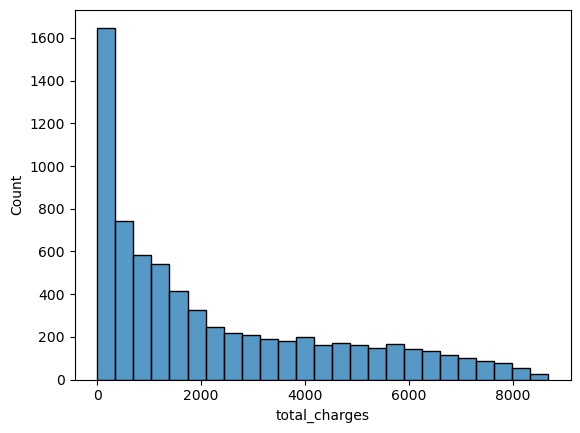

In [229]:
sns.histplot(telco['total_charges'])

In [230]:
phone_service = telco[telco['phone_service'] == 'Yes']
internet_1 = telco[telco['internet_service_type_id'] == 1]
internet_2 = telco[telco['internet_service_type_id'] == 2]

P value: 4.094044991493961e-99, Pearson R: 0.24789985628615008


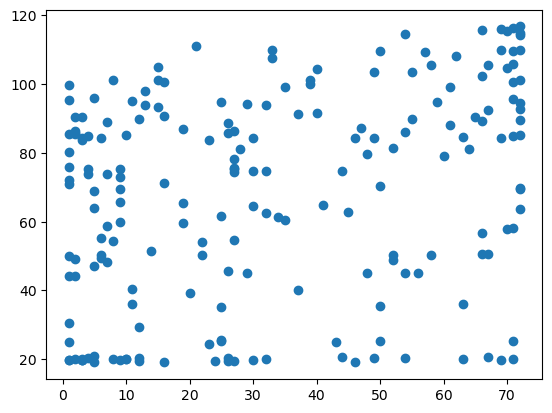

In [231]:
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
plt.scatter(telco['tenure'].head(200), telco['monthly_charges'].head(200))
print(f'P value: {p}, Pearson R: {r}')


In [232]:
def eval_dist(r,p,alpha=0.05):
    if p>alpha:
        return print(f'''The data is normally distributed''')
    else:
        return print(f'''The data is NOT normally disributed''')

In [233]:
from scipy.stats import shapiro

In [234]:
r, p = stats.shapiro(telco.monthly_charges)
r, p

/opt/homebrew/Caskroom/miniforge/base/envs/codeup/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [235]:
r,p = stats.shapiro(telco.tenure)
eval_dist(r,p)

The data is NOT normally disributed


In [236]:
sr, sp = stats.spearmanr(telco.tenure, telco.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [237]:
def eval_Sresults(r,p, alpha=0.05):
    if p < alpha:
        return print(f'''Reject the null hypothesis. There is a linear correlation. Spearman R: {sr}P Value: {sp}.''')
    else:
        return print(f'''We do NOT reject the null hypothesis. There is a linear correlation.) Spearman R: {sr} P Value: {sp}.''')

eval_Sresults(sr,sp)


Reject the null hypothesis. There is a linear correlation. Spearman R: 0.27641678933130215P Value: 1.0271266876409408e-123.


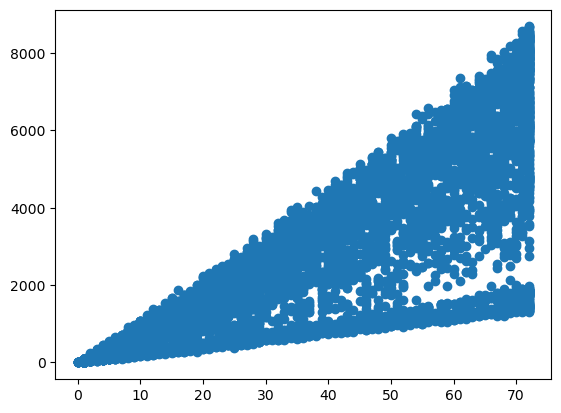

In [238]:
ar, ap = stats.pearsonr(telco['tenure'], telco['total_charges'])
plt.scatter(telco['tenure'], telco['total_charges'])

In [239]:
shap_ar,shap_ap = stats.shapiro(telco['total_charges'])
eval_dist(shap_ar,shap_ap)

The data is NOT normally disributed


In [240]:
sr, pr = stats.spearmanr(telco['tenure'], telco['total_charges'])
eval_Sresults(sr,pr)

Reject the null hypothesis. There is a linear correlation. Spearman R: 0.8896957900597577P Value: 1.0271266876409408e-123.


P value: 7.1178710778977e-88, Pearson R: 0.24538898585362895


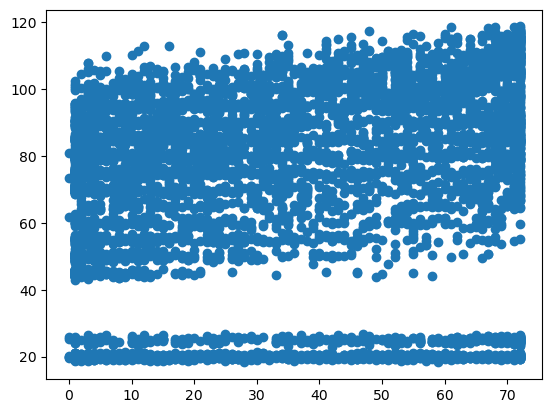

In [241]:
phone_r,phone_p = stats.pearsonr(phone_service['tenure'], phone_service['monthly_charges'])
plt.scatter(phone_service['tenure'], phone_service['monthly_charges'])
print(f'P value: {phone_p}, Pearson R: {phone_r}')

P value: 0.5172828196602484, Pearson R: 8.360426862310417e-166


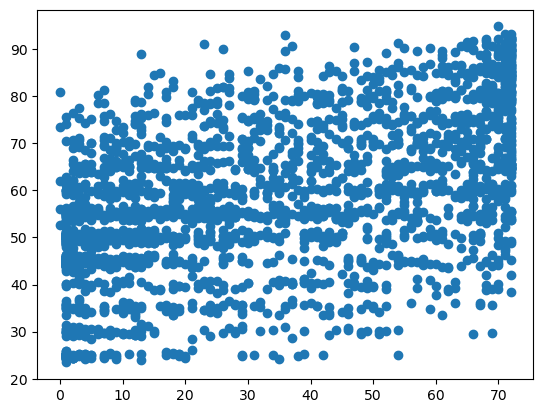

In [242]:
plt.scatter(internet_1['tenure'], internet_1['monthly_charges'])
int1_r,int1_p = stats.pearsonr(internet_1['tenure'], internet_1['monthly_charges'])
print(f'P value: {int1_r}, Pearson R: {int1_p}')

P value: 0.6246206176175588, Pearson R: 0.0


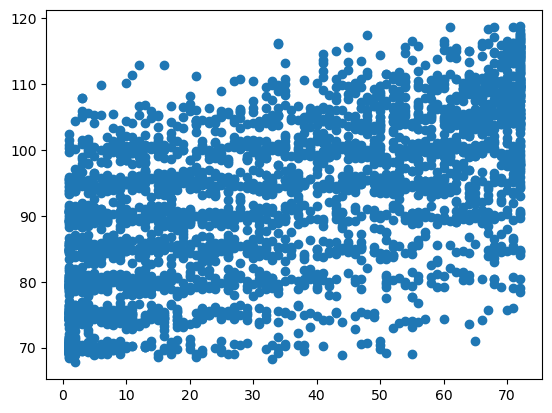

In [243]:
plt.scatter(internet_2['tenure'], internet_2['monthly_charges'])
int2_r,int2_p = stats.pearsonr(internet_2['tenure'], internet_2['monthly_charges'])
print(f'P value: {int2_r}, Pearson R: {int2_p}')

3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [244]:
url_employees = get_db_url(env.user,env.password,env.host,'employees')
query_employees = 'select * from employees as e join salaries as s on e.emp_no = s.emp_no where s.to_date > now()'
employees = pd.read_sql(query_employees,url_employees)

In [245]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


In [246]:
employees.hire_date.dtype

dtype('O')

In [247]:
# converting date time to work with stats
from datetime import date
employees['tenure'] = (employees.to_date - employees.hire_date)
employees['tenure'].astype('int')

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'datetime.timedelta'

In [ ]:
emp_r, emp_p = stats.pearsonr(employees['amount_days'],employees['salary'])
# could not find proper date conversion, only a datetime.timedelta
sns.scatterplot(x=employees['hire_date'].head(10),y=employees['salary'].head(10),data=employees)
print(f'P value: {emp_r}, Pearson R: {emp_p}')

TypeError: unsupported operand type(s) for +: 'float' and 'datetime.timedelta'

In [ ]:
query_titles = 'select * from employees as e join titles as t on e.emp_no = t.emp_no where t.to_date < now()'
titles = pd.read_sql(query_employees,url_employees)

In [ ]:
sns.scatterplot(x=titles['emp_no'].head(10),y=employees['title'].head(10),data=employees)

KeyError: 'title'

4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [ ]:
sleep = data('sleepstudy')

In [ ]:
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [ ]:
sleep_r, sleep_p = stats.pearsonr(sleep['Days'],sleep['Reaction'])
print(f'P value: {sleep_r}, Pearson R: {sleep_p}')

P value: 0.5352302262650253, Pearson R: 9.89409632221466e-15


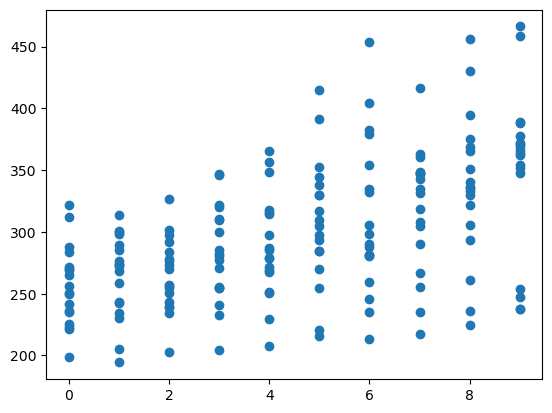

In [ ]:
plt.scatter(sleep['Days'],sleep['Reaction'])

## Comparison of Means

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Discrete & Continious // t-test 1 sample, 2 tailed
- Are adults who drink milk taller than adults who don't drink milk?
    - Discrete & Continious // t-test 1 sample, 2 tailed
- Is the price of gas higher in Texas or in New Mexico?
    - Discrete & Continious // t-test 2 sample, 2 tailed
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Discrete & Continious // t-test 2 sample, 1 tailed
    - Analysis of variance OR ANOVA
    - if measured as (low,med,high) X (ds,wd,cap) - therefore turning the analysis into a categorical
    - manifested into a proportion test // chi<sup>2</sup>

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

#### 2A: Office 1 sells more homes ~34.5% of the time.

$H_0$: Office 1 on average sells more houses than Office 2.\
$H_a$: Office 1 does not sell more houses on average than Office 2.

In [259]:
off1 = 90
off1_std = 15
off2 = 100
off2_std = 20
trials = 100000
a = .05

In [442]:
stats.ttest_ind_from_stats?

Signature:
stats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
    alternative='two-sided',
)
Docstring:
T-test for means of two independent samples from descriptive statistics.

This is a test for the null hypothesis that two independent
samples have identical average (expected) values.

Parameters
----------
mean1 : array_like
    The mean(s) of sample 1.
std1 : array_like
    The corrected sample standard deviation of sample 1 (i.e. ``ddof=1``).
nobs1 : array_like
    The number(s) of observations of sample 1.
mean2 : array_like
    The mean(s) of sample 2.
std2 : array_like
    The corrected sample standard deviation of sample 2 (i.e. ``ddof=1``).
nobs2 : array_like
    The number(s) of observations of sample 2.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
   

In [448]:
t, p = stats.ttest_ind_from_stats(off1, off1_std, 40,off2, off2_std, 50)

print(t, p/2, a)

-2.6252287036468456 0.005104926224619695 0.05


In [447]:
office1 = np.random.normal(off1,off1_std,size=(40,))
office2 = np.random.normal(off2,off2_std,size=(50,))
office_1_rvs = stats.norm(off1,off1_std).rvs(40)
office_2_rvs = stats.norm(off2,off2_std).rvs(50)

#compare = (office1 > office2)

#compare_sum = (compare == True).sum()
#compare_sum / trials * 100

### 3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [311]:
mpg = data('mpg')

In [312]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


$H_0$: There is *NOT* a difference in fuel efficiency from vehicles in 1999 compared to 2008.\
$H_a$: There is a difference in fuel efficiency from vehicles in 1999 compared to 2008.

In [452]:
mpg['avg_miles'] = (mpg['cty'] + mpg['hwy']) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [454]:
car_1999 = mpg[mpg['year'] == 1999]
car_2008 = mpg[mpg['year'] == 2008]
car_1999mi = car_1999['avg_miles']
car_2008mi = car_2008['avg_miles']

In [457]:
lev_stat, p = stats.levene(car_1999mi,car_2008mi)

p, lev_stat

(0.855517569468803, 0.033228136671080453)

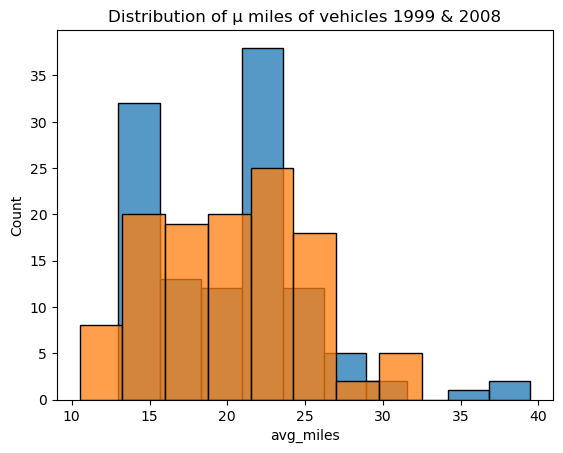

In [351]:
sns.histplot(car_1999mi)
sns.histplot(car_2008mi)
plt.title('Distribution of µ miles of vehicles 1999 & 2008')
plt.show()

In [399]:
t, p = stats.ttest_ind(car_1999mi, car_2008mi)
t, p
print(f"t < 0:", t > 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p/2 < a)


t < 0: True
We reject the null hypothesis; p/2 < alpha: False


$H_0$: Compact cars are more fuel efficient than the average cars.\
$H_a$: Compact cars are *NOT* more fuel efficient than the average cars.

Avg 1 group vs. avg of population

In [472]:
compact_avg = mpg['avg_miles'][mpg['class'] == 'compact']
avg_miles = mpg['avg_miles'].mean()
avg_samp = mpg['avg_miles'][mpg['class'] == '']
print(len(compact_avg))
len(avg_miles_samp)

47


47

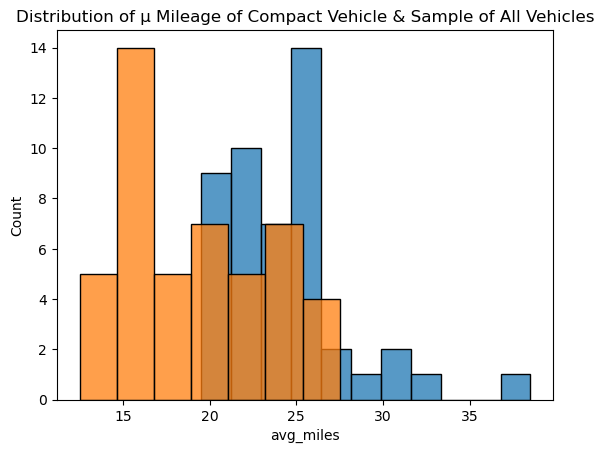

In [470]:
sns.histplot(compact_avg)
sns.histplot(avg_miles_samp)
plt.title('Distribution of µ Mileage of Compact Vehicle & Sample of All Vehicles')
plt.show()

In [469]:
# Wilcoxon stats test because comparing to average of the population and distribution is not(?) normal.
#t2, p2 = stats.wilcoxon(compact_avg,avg_miles)
#print(f"t < 0:", t2 > 0)
#print(f"We accept the null hypothesis; p/2 < alpha:", p2/2 > a)
#t2, p2

ValueError: The samples x and y must have the same length.

In [465]:
# 1 sample ttest - avg compact car (x) avg_miles of population
t3, p3 = stats.ttest_1samp(compact_avg, avg_miles)
print(f"t < 0:", t3 > 0)
print(f"We accept the null hypothesis; p/2 < alpha:", p3/2 > alpha)
t3, p3

t < 0: True
We accept the null hypothesis; p/2 < alpha: False


(9.881668054080283, 5.935218349674527e-13)

$H_0$: Automatic transmission vehicles are more fuel efficient than manual transmission vehicles.\
$H_a$: Automatic transmission vehicles *NOT* more fuel efficient than manual transmission vehicles.

1 group (x) 1 group

In [432]:
auto = mpg['avg_miles'][mpg['trans'].str.contains('auto')]
auto_samp = mpg['avg_miles'][mpg['trans'].str.contains('auto')].sample(77)
manual = mpg['avg_miles'][mpg['trans'].str.contains('manual')]
len(manual)

77

Text(0.5, 1.0, 'µ fuel efficiency, Automatic & Manual')

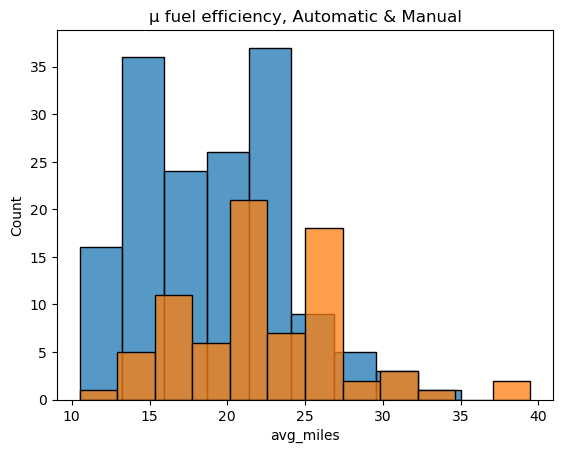

In [476]:
sns.histplot(auto)
sns.histplot(manual)
plt.title('µ fuel efficiency, Automatic & Manual')

In [480]:
t4, p4 = stats.ttest_ind(auto, manual,equal_var=True)
print(f"t < 0:", t4 < 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p4/2 < alpha)
t4, p5

t < 0: True
We reject the null hypothesis; p/2 < alpha: True


(-4.593437735750014, 9.859599786061749e-06)

In [479]:
t5, p5 = stats.mannwhitneyu(auto,manual)
print(f"t < 0:", t5 < 0)
print(f"We reject the null hypothesis; p/2 < alpha:", p5/2 < alpha)
t5, p5

t < 0: False
We reject the null hypothesis; p/2 < alpha: True


(3895.5, 9.859599786061749e-06)